In [605]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_bvp

# set up the right hand side of the ODE, with the parameter
# tf (the final time rescaled)

g = 9.8
m = 2
alpha = 0.1

def rocket_ode(t,y,p):
    tf=p[0]
    out = tf*np.array([0*y[0],2*alpha*y[5] - y[0],0*y[0],2*alpha*y[7] - y[2],y[5],y[1]/(2*m**2),y[7],y[3]/(2*m**2) - g])
    
#     print(out)
#     print("here")
    return out

 # set up the endpoint conditions. The final one is H(tf) = 2a( -tf-1)
def bc_new(ya,yb,p):
    x0 = 10
    y0 = 10
    vx0 = 12
    vy0 = 0
    
    xf = 0
    yf = 1
    
    alpha = 1
    
    
    H = -g*yb[3] + (yb[1]**2 + yb[3]**2)/(4*m**2) + yb[0]*yb[5] - alpha*yb[5]**2 + yb[2]*yb[7] - alpha*yb[7]**2
    # bcs with inital velocity
    return np.array([ya[4] - x0,ya[6] - y0,ya[5] - vx0,ya[7] - vy0,yb[4] - xf,yb[6] - yf,yb[5],yb[7],H])
    # bcs with final angle
    #costate_mag = np.sqrt(yb[1]**2 + yb[3]**2)
    #return np.array([ya[4] - x0,ya[6] - y0,np.arctan2(-yb[3],yb[1]),ya[7] - vy0,yb[4] - xf,yb[6] - yf,yb[5],yb[7],H])

 # construct the solution using solve_bvp. We use an initial -guess
 # of tf=1 as that is the value we are forcing the solution to be -close to.
t=np.linspace(0,1,1000)
y = np.zeros((8, t.size))
res = solve_bvp(rocket_ode, bc_new, t, y, p=[10],max_nodes = 200000,tol = 1e-2)
print(res.success)

# plot the results and print out the optimal final time t_f
t_plot = np.linspace(0, 1, 400)
x_plot = res.sol(t_plot)[4]
y_plot = res.sol(t_plot)[6]
p1 = res.sol(t_plot)[0]
p2 = res.sol(t_plot)[1]
p3 = res.sol(t_plot)[2]
p4 = res.sol(t_plot)[3]

p2_p4_mag = np.sqrt(p2**2 + p4**2)

theta = np.arctan2(p4/p2_p4_mag,p2/p2_p4_mag)

abs_vel = np.sqrt(res.sol(t_plot)[5]**2 + res.sol(t_plot)[7]**2)


T = (p2**2 + p4**2)/(2*m*p2_p4_mag)

# plt.plot(t_plot, x_plot)
# plt.plot(t_plot, -.5*p_plot)
# plt.legend(['cancer cells','chemo concentration'])
print('t_f = '+str(res.p[0]))

True
t_f = 4.142650167651077


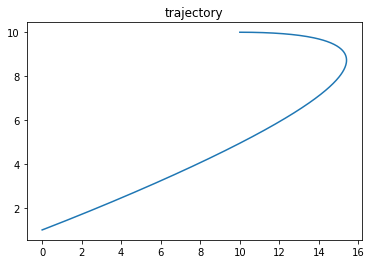

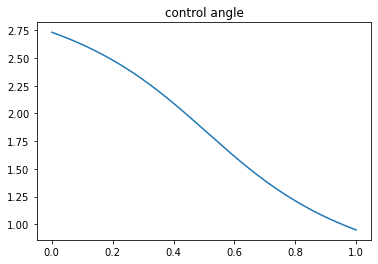

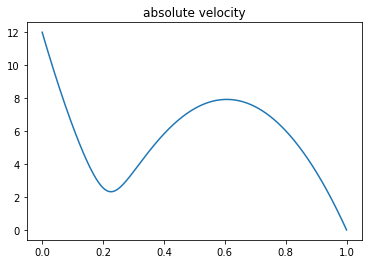

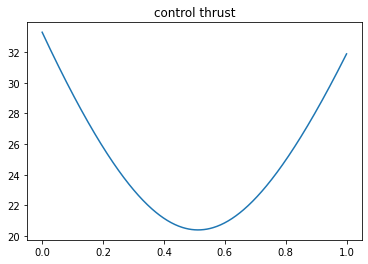

In [606]:
plt.plot(x_plot,y_plot)
plt.title("trajectory")
plt.show()
plt.plot(t_plot,theta)
plt.title("control angle")
plt.show()
plt.plot(t_plot,abs_vel)
plt.title("absolute velocity")
plt.show()
plt.plot(t_plot,T)
plt.title("control thrust")
plt.show()

In [830]:
class lander():
    
    def __init__(self,x0,y0,xv0,yv0,T,m,theta,dT):
        self.x = x0
        self.y = y0
        self.xv = xv0
        self.yv = yv0
        self.T = T
        self.theta = theta
        self.dT = dT
        self.m = m
        
        self.T_c = 0
        self.theta_c = 0
        self.g = 9.8
        
        self.max_T = 100000
        self.max_theta = 2*np.pi
        
    def step(self):
        self.x += self.xv*self.dT
        self.y += self.yv*self.dT
        self.xv += (self.T/self.m)*np.sin(self.theta)*self.dT
        self.yv -= (self.g - (self.T/self.m)*np.cos(self.theta))*self.dT
        
        self.T += self.T_c
        self.theta += self.theta_c
        
        if self.T > self.max_T:
            self.T = self.max_T
        if self.theta > self.max_theta:
            self.theta = 0
            
    def set_control(self,dThrust,dTheta):
        self.T_c = dThrust
        self.theta_c = dTheta
        
    def set_vel(self,vx,vy):
        self.xv = vx
        self.yv = vy
        
    def set_strong_control(self,Thrust,theta):
        self.T = Thrust
        self.theta = theta
        
    def get_state(self):
        return self.x,self.xv,self.y,self.yv,self.theta,self.T
    
    
    
class op_traject():
    def calc_approach(self,x0,y0,vx0,vy0,xf,yf,m,alpha,buf):
        yf = yf + buf
                                   # set up the right hand side of the ODE, with the parameter
        # tf (the final time rescaled)
        g = 9.8/1.5
        def rocket_ode(t,y,p):
            tf=p[0]
            out = tf*np.array([0*y[0],2*alpha*y[5] - y[0],0*y[0],2*alpha*y[7] - y[2],y[5],y[1]/(2*m**2),y[7],y[3]/(2*m**2) - g])

            return out

         # set up the endpoint conditions. The final one is H(tf) = 2a( -tf-1)
        def bc_new(ya,yb,p):

            H = -g*yb[3] + (yb[1]**2 + yb[3]**2)/(4*m**2) + yb[0]*yb[5] - alpha*yb[5]**2 + yb[2]*yb[7] - alpha*yb[7]**2
            # bcs with inital velocity
            return np.array([ya[4] - x0,ya[6] - y0,ya[5] - vx0,ya[7] - vy0,yb[4] - xf,yb[6] - yf,yb[5],yb[7],H])
 
        t=np.linspace(0,1,1000)
        y = np.zeros((8, t.size))
        self.res = solve_bvp(rocket_ode, bc_new, t, y, p=[1],max_nodes = 20000)
        print(self.res.success)
        self.tf = res.p[0]
        self.yf = yf
        self.xf = xf
        self.buf = buf
        self.m = m

        self.traj = np.vstack((self.res.sol(np.linspace(0,1,200))[4],self.res.sol(np.linspace(0,1,200))[6])).T
                              
    def calc_land(self):
        y_goal = self.yf - buf
        x_goal = self.xf
        
    def get_goal(self,t):
        if t <= np.abs(self.tf):
            t = t/np.abs(self.tf)
            
            p1,p2,p3,p4,x,xv,y,yv = self.res.sol(t)
            return x,xv,y,yv,np.arctan2(-p4,p2),np.sqrt(p2**2 + p4**2)/(2*self.m)
        
        
#     # plot the results and print out the optimal final time t_f
#     t_plot = np.linspace(0, It would be good to get on a zoom and talk 1, 100)
#     x_plot = res.sol(t_plot)[4]
#     y_plot = res.sol(t_plot)[6]
#     p1 = res.sol(t_plot)[0]
#     p2 = res.sol(t_plot)[1]
#     p3 = res.sol(t_plot)[2]
#     p4 = res.sol(t_plot)[3]

#     p2_p4_mag = np.sqrt(p2**2 + p4**2)

#     theta = np.arctan2(-p4/p2_p4_mag,p2/p2_p4_mag)

#     abs_vel = np.sqrt(res.sol(t_plot)[5]**2 + res.sol(t_plot)[7]**2)


#     T = (p2**2 + p4**2)/(2*m*p2_p4_mag)


class PID():
    def __init__(self,Kp,Ki,Kd,MV_bar = 0,dT = 1e-2):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.dT = dT
        self.I = 0
        self.e_prev = 0
        self.MV_bar = MV_bar
        
    def step(self,e):
        self.P = self.Kp*e
        self.I += self.Ki*e*dT
        self.D = self.Kd*(e - self.e_prev)/self.dT
        self.e_prev = e
        MV = self.MV_bar + self.P + self.I + self.D
        
        return MV
        


True


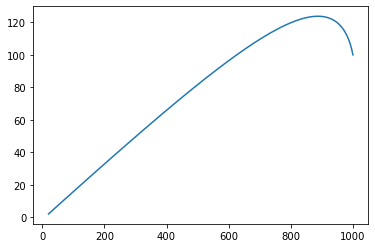

4.142650167651077


In [872]:
from scipy.linalg import solve_continuous_are

x0 =  1000
y0 = 100
xv0 = 10
yv0 = -10

xf = 20
yf = 0

T = 0
theta = 0

max_T_C = 5
max_Theta_C = 0.2

m = 2

alpha = 1e-1
buf = 2
dT = 1e-2
dT_PID = 1e-3

#LQR

A = np.array([[0,1,0,0],[0,0,0,0],[0,0,0,1],[0,0,0,0]])
B = np.array([[0,0],[1/m,0],[0,0],[0,1/m]])

Q = np.diag([2,1e-10,2,1e-10])
R = np.diag([1/300,1/300])

P = solve_continuous_are(A,B,Q,R)

u_opt = -np.linalg.inv(R)@B.T@P


ship = lander(x0,y0,-xv0,yv0,T,m,theta,dT_PID)
trajectory = op_traject()
trajectory.calc_approach(x0,y0,xv0,yv0,xf,yf,m,alpha,buf)

plt.plot(trajectory.traj[:,0],trajectory.traj[:,1])
plt.show()

tf = trajectory.tf

print(tf)

t = 0

pos = []
target_pos = []
vel = []
target_vel = []

rotation = []
thrust = []

thrustPID = PID(0.5,0.4,1e-4,dT = dT)
thetaPID = PID(0.5,0.4,1e-4,dT = dT)


while True:
    if t >= tf:
        break
    x_actual,xv_actual,y_actual,yv_actual,theta_actual,thrust_actual = ship.get_state()
    rotation.append(theta_actual)
    thrust.append(thrust_actual)
    pos.append([x_actual,y_actual])
    vel.append([xv_actual,yv_actual])
    x_target,xv_target,y_target,yv_target,theta_target,thrust_target = trajectory.get_goal(t)
    target_vel.append([xv_target,yv_target])
    target_pos.append([x_target,y_target])
    
    
    state_err = np.array([x_actual - x_target,xv_actual+xv_target,y_actual-y_target,yv_actual+yv_target])
    
    desired_f = u_opt@state_err
    
    T_desired = np.linalg.norm(desired_f)
    theta_desired = np.arctan2(desired_f[0],desired_f[1])
    
    for i in range(int(dT/dT_PID)):
        _,_,_,_,theta_act,thrust_act = ship.get_state()
        
        T_control = thrustPID.step(T_desired - thrust_act)
        Theta_control = thetaPID.step(theta_desired - theta_act)
        ship.set_control(T_control,Theta_control)
        ship.step()
        
    t += dT
    
    

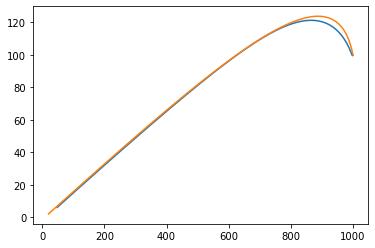

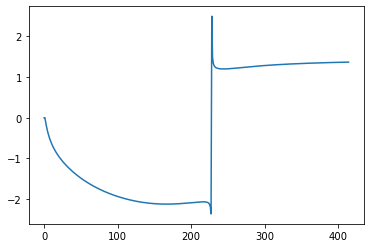

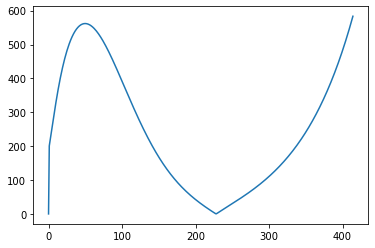

In [873]:
pos = np.array(pos)
vel = np.array(vel)
target_vel = np.array(target_vel)
#print(trajectory.traj.shape)
target_pos = np.array(target_pos)
plt.plot(pos[:,0],pos[:,1])
plt.plot(target_pos[:,0],target_pos[:,1])
plt.show()
plt.plot(rotation)
plt.show()
plt.plot(thrust)
plt.show()

-1.0